# Book recommender project

### Importing libraries 

In [1]:
# data cleaning and EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# build a model
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# text analysis
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from textblob import TextBlob

### Reading the data 

In [2]:
data=pd.read_excel('survey_answers.xlsx')

In [4]:
data.head(3)

,Unnamed: 0,CHECKING TIME,Book title,Author,Publishing house,Literary genre:,Subgenre (only if it is necessary),Publication date ONLY YEAR,TOTAL number of pages,In which kind of edition can we find this book?,...,How many MAIN characters has this book?,MAIN character gender:,MAIN character age:,Describe the main character. How do you feel about him/her?,POINT OF VIEW. Who tells the story?,Does the book have a film/tv adaptation?,REVIEW / KEYWORDS. How would you refer to this book?,How the book made you feel?,Write here your favourite quote of the book or the first quote the book starts with:,Marca temporal
0,0,2021-07-16 22:46:47.301,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",...,1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,NaT
1,1,2021-07-16 23:57:20.942,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",...,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",NaT
2,2,2021-07-17 00:03:47.992,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",...,1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,NaT


### Standardising column names 

In [5]:
# converting to lowercase and filling the gaps
data.columns.str.lower()

Index(['unnamed: 0', 'checking time', 'book title', 'author',
       'publishing house', 'literary genre:',
       'subgenre (only if it is necessary)', 'publication date only year ',
       'total number of pages ',
       'in which kind of edition can we find this book?',
       'is it part of a series/saga, or is it a standalone book?',
       'original language in which it was written',
       'theme. can you tell me in 2-3 lines which is the starting point of the book?',
       'what are the main topics of the book? think only about those that define it. ',
       'setting time. in what year does this story take place?',
       'setting place. in what country, city or town, does this story take place?',
       'how many main characters has this book?', 'main character gender:',
       'main character age:',
       'describe the main character. how do you feel about him/her?',
       'point of view. who tells the story?',
       'does the book have a film/tv adaptation?',
       'r

In [6]:
data.columns = [col.lower().replace(' ','_') for col in data.columns]

In [7]:
data.head(5)

,unnamed:_0,checking_time,book_title,author,publishing_house,literary_genre:,subgenre_(only_if_it_is_necessary),publication_date_only_year_,total_number_of_pages_,in_which_kind_of_edition_can_we_find_this_book?,...,how_many_main_characters_has_this_book?,main_character_gender:,main_character_age:,describe_the_main_character._how_do_you_feel_about_him/her?,point_of_view._who_tells_the_story?,does_the_book_have_a_film/tv_adaptation?,review_/_keywords._how_would_you_refer_to_this_book?,how_the_book_made_you_feel?,write_here_your_favourite_quote_of_the_book_or_the_first_quote_the_book_starts_with:,marca_temporal
0,0,2021-07-16 22:46:47.301,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",...,1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,NaT
1,1,2021-07-16 23:57:20.942,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",...,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",NaT
2,2,2021-07-17 00:03:47.992,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",...,1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,NaT
3,3,2021-07-17 00:07:02.386,Una corte de rosas y espinas,Sarah J Maas,Planeta,fantasy,romance,2016,463,paperback,...,4 - 6,female,18-30,Fuerte pero con cierta vulnerabilidad,1st unique,no,favourite one,"intense emotions, love",Por las estrellas que escuchan y los sueños qu...,NaT
4,4,2021-07-17 00:17:33.531,Frankenstein o El Moderno Prometeo,Mary Shelley,Edimat,science fiction,"classic, gothic, victorian",1818,250,hardback,...,1 - 3,male,18-30,Hombre joven de la clase aristocrática de Gine...,1st multiple,yes,"i recommend, favourite one, wonderful characte...","fun/laughing, reflexive, empathy, sadness, ten...","Aprende de mí, sino por mis preceptos, al meno...",NaT


In [8]:
# renaming the headers, they are too long
data_renamed=data.rename(columns={'book_title': 'title',
            'literary_genre:': 'genre',
            'subgenre_(only_if_it_is_necessary)': 'subgenre',
            'publication_date_only_year_': 'publication_date',
            'total_number_of_pages_': 'pages',
            'in_which_kind_of_edition_can_we_find_this_book?': 'edition',
            'is_it_part_of_a_series/saga,_or_is_it_a_standalone_book?': 'story_length',
            'original_language_in_which_it_was_written': 'original_language',
            'theme._can_you_tell_me_in_2-3_lines_which_is_the_starting_point_of_the_book?': 'theme',
            'what_are_the_main_topics_of_the_book?_think_only_about_those_that_define_it._': 'main_topics',
            'setting_time._in_what_year_does_this_story_take_place?': 'setting_time',
            'setting_place._in_what_country,_city_or_town,_does_this_story_take_place?': 'setting_place',
            'how_many_main_characters_has_this_book?': 'character_number',
            'main_character_gender:': 'character_gender',
            'main_character_age:': 'character_age',
            'describe_the_main_character._how_do_you_feel_about_him/her?': 'character_description',
            'point_of_view._who_tells_the_story?': 'pov',
            'does_the_book_have_a_film/tv_adaptation?': 'adaptation',
            'review_/_keywords._how_would_you_refer_to_this_book?': 'review',
            'how_the_book_made_you_feel?': 'feelings',
            'write_here_your_favourite_quote_of_the_book_or_the_first_quote_the_book_starts_with:': 'quote'
             }, inplace=False)

In [9]:
data_renamed.head()

,unnamed:_0,checking_time,title,author,publishing_house,genre,subgenre,publication_date,pages,edition,...,character_number,character_gender,character_age,character_description,pov,adaptation,review,feelings,quote,marca_temporal
0,0,2021-07-16 22:46:47.301,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",...,1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,NaT
1,1,2021-07-16 23:57:20.942,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",...,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",NaT
2,2,2021-07-17 00:03:47.992,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",...,1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,NaT
3,3,2021-07-17 00:07:02.386,Una corte de rosas y espinas,Sarah J Maas,Planeta,fantasy,romance,2016,463,paperback,...,4 - 6,female,18-30,Fuerte pero con cierta vulnerabilidad,1st unique,no,favourite one,"intense emotions, love",Por las estrellas que escuchan y los sueños qu...,NaT
4,4,2021-07-17 00:17:33.531,Frankenstein o El Moderno Prometeo,Mary Shelley,Edimat,science fiction,"classic, gothic, victorian",1818,250,hardback,...,1 - 3,male,18-30,Hombre joven de la clase aristocrática de Gine...,1st multiple,yes,"i recommend, favourite one, wonderful characte...","fun/laughing, reflexive, empathy, sadness, ten...","Aprende de mí, sino por mis preceptos, al meno...",NaT


### Dropping unrelevant columns 

In [10]:
data_books=data_renamed.drop(['unnamed:_0', 'checking_time', 'marca_temporal'], axis=1)

In [14]:
data_books.head()

,title,author,publishing_house,genre,subgenre,publication_date,pages,edition,story_length,original_language,theme,main_topics,setting_time,setting_place,character_number,character_gender,character_age,character_description,pov,adaptation,review,feelings,quote
0,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",standalone,spanish,Una chica que acaba de romper con su novio de ...,"friendship, love, goals/dreams, personal growt...",current time,"paris, london, ibiza, australia, usa",1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...
1,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",series/saga,spanish,"Amor, odio, extrañas prácticas, intriga y acci...",love,1892,uk,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ..."
2,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",standalone,spanish,La familia de Amelia Garayoa (bisabuela) quier...,"family, love, revenge, pain/trauma, personal g...",1960,"spain, paris, buenos aires, moscow, rome, lond...",1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...
3,Una corte de rosas y espinas,Sarah J Maas,Planeta,fantasy,romance,2016,463,paperback,series/saga,english,Una chica humana que vive en un mundo donde se...,"family, friendship, love, feminism",ficticious time,ficticious world,4 - 6,female,18-30,Fuerte pero con cierta vulnerabilidad,1st unique,no,favourite one,"intense emotions, love",Por las estrellas que escuchan y los sueños qu...
4,Frankenstein o El Moderno Prometeo,Mary Shelley,Edimat,science fiction,"classic, gothic, victorian",1818,250,hardback,standalone,english,Un científico descubre cómo darle vida a una c...,"goals/dreams, good and evil forces , nature, g...",1700,"geneva, london, germany",1 - 3,male,18-30,Hombre joven de la clase aristocrática de Gine...,1st multiple,yes,"i recommend, favourite one, wonderful characte...","fun/laughing, reflexive, empathy, sadness, ten...","Aprende de mí, sino por mis preceptos, al meno..."


In [12]:
#data_books.to_excel('data_books.xlsx')

In [13]:
pd.set_option('display.max_columns', None)

### Exploring the data 

In [15]:
data_books.shape

(425, 23)

In [16]:
data_books.info() # only nulls in subgenre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  425 non-null    object
 1   author                 425 non-null    object
 2   publishing_house       425 non-null    object
 3   genre                  425 non-null    object
 4   subgenre               326 non-null    object
 5   publication_date       425 non-null    int64 
 6   pages                  425 non-null    int64 
 7   edition                425 non-null    object
 8   story_length           425 non-null    object
 9   original_language      425 non-null    object
 10  theme                  425 non-null    object
 11  main_topics            425 non-null    object
 12  setting_time           425 non-null    object
 13  setting_place          425 non-null    object
 14  character_number       425 non-null    object
 15  character_gender       

In [17]:
data_books.describe()

,publication_date,pages
count,425.000000,425.000000
mean,1996.032941,438.644706
std,56.704496,188.674119
min,1287.000000,60.000000
25%,2005.000000,318.000000
50%,2016.000000,416.000000
75%,2019.000000,528.000000
max,2022.000000,1608.000000


In [18]:
data_books['original_language'].value_counts()

english      200
spanish      160
french        14
german        13
japanese      11
swedish        6
italian        5
russian        4
catalan        3
norwegian      2
romanian       2
finnish        1
polish         1
occitan        1
chinese        1
danish         1
Name: original_language, dtype: int64

<AxesSubplot:>

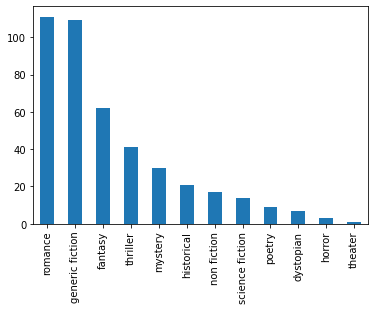

In [19]:
# visualising the genres
data_books['genre'].value_counts().plot(kind='bar') 

<AxesSubplot:>

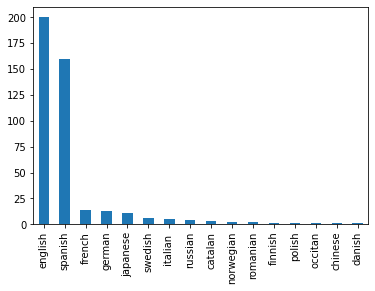

In [20]:
# visualising the original languages
data_books['original_language'].value_counts().plot(kind='bar') 

<AxesSubplot:>

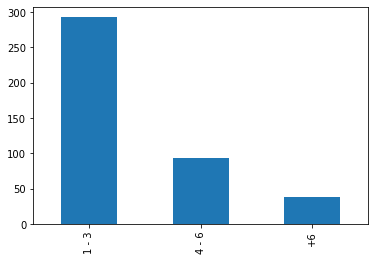

In [21]:
# number of characters
data_books['character_number'].value_counts().plot(kind='bar') 

<AxesSubplot:>

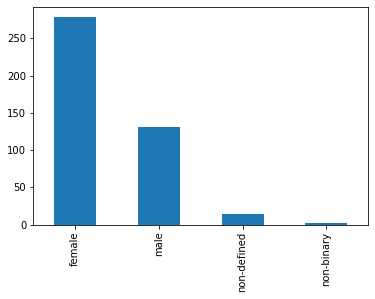

In [22]:
# gender of the main character
data_books['character_gender'].value_counts().plot(kind='bar') 

<AxesSubplot:>

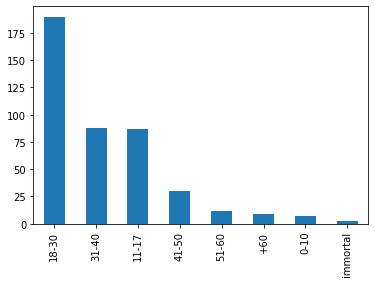

In [23]:
# ages of the main characters 
data_books['character_age'].value_counts().plot(kind='bar') 

<AxesSubplot:>

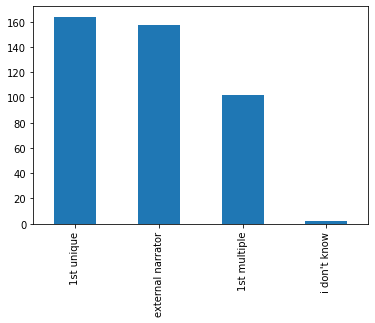

In [24]:
# point of views
data_books['pov'].value_counts().plot(kind='bar') 

<AxesSubplot:>

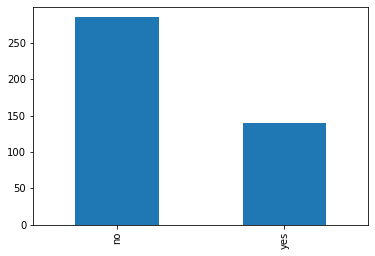

In [25]:
# film adaptation yes or no
data_books['adaptation'].value_counts().plot(kind='bar') 

In [26]:
# need to explore more when manage to translate (heavy text columns: theme, character_description, quote). 
# review and feelings too??) 

### Text Analysis 

In [27]:
textanalysis=data_books[['title', 'genre', 'quote']]

In [28]:
textanalysis

,title,genre,quote
0,Nosotros en la luna,romance,Es imposible saber cuando conocerás a esa pers...
1,El día que se perdio la cordura,thriller,"Todavía no me puedo creer lo que hice anoche, ..."
2,Dime quién soy,historical,El despacho de mi tía resultaba agobiante. En ...
3,Una corte de rosas y espinas,fantasy,Por las estrellas que escuchan y los sueños qu...
4,Frankenstein o El Moderno Prometeo,science fiction,"Aprende de mí, sino por mis preceptos, al meno..."
...,...,...,...
420,The Picture of Dorian Gray,mystery,“You will always be fond of me. I represent to...
421,Das Parfum,historical,“He who ruled scent ruled the hearts of men.”
422,the brief wondrous life of oscar wao,generic fiction,But if these years have taught me anything it ...
423,Sapiens,non fiction,"Hace unos 14000 millones de años, materia, ene..."


In [29]:
# calculate the length of the quotes
def get_len(x):
    if x==x:
        return len(x)
    else:
        return 0

In [30]:
textanalysis['quote'].apply(get_len)

0      183
1      281
2      226
3       66
4      116
      ... 
420    101
421     45
422    111
423    119
424     45
Name: quote, Length: 425, dtype: int64

In [31]:
# adding the length of the reviews as a column in the dataframe
textanalysis['quote_length'] = textanalysis['quote'].apply(get_len)

<ipython-input-31-ed18a636eadc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  textanalysis['quote_length'] = textanalysis['quote'].apply(get_len)


In [32]:
textanalysis

,title,genre,quote,quote_length
0,Nosotros en la luna,romance,Es imposible saber cuando conocerás a esa pers...,183
1,El día que se perdio la cordura,thriller,"Todavía no me puedo creer lo que hice anoche, ...",281
2,Dime quién soy,historical,El despacho de mi tía resultaba agobiante. En ...,226
3,Una corte de rosas y espinas,fantasy,Por las estrellas que escuchan y los sueños qu...,66
4,Frankenstein o El Moderno Prometeo,science fiction,"Aprende de mí, sino por mis preceptos, al meno...",116
...,...,...,...,...
420,The Picture of Dorian Gray,mystery,“You will always be fond of me. I represent to...,101
421,Das Parfum,historical,“He who ruled scent ruled the hearts of men.”,45
422,the brief wondrous life of oscar wao,generic fiction,But if these years have taught me anything it ...,111
423,Sapiens,non fiction,"Hace unos 14000 millones de años, materia, ene...",119


In [33]:
#check if any unreadable or unuseful quote and drop
textanalysis['quote_length'].min()

2

In [34]:
textanalysis.loc[textanalysis['quote_length']==2]

,title,genre,quote,quote_length
193,Ciudad de ladrones,historical,__,2


In [35]:
textanalysis=textanalysis.drop([193])

##### Remove meaningless words 

First, check stopwords for each language in the dataframe.

In [36]:
stop_words = set(stopwords.words('spanish'))

In [37]:
len(stop_words)

313

In [38]:
stop_words_eng=set(stopwords.words('english'))

In [39]:
len(stop_words_eng)

179

In [40]:
stop_words_fr=set(stopwords.words('french'))

In [41]:
len(stop_words_fr)

157

In [42]:
stop_words_pt=set(stopwords.words('portuguese'))

In [43]:
len(stop_words_pt)

204

In [44]:
# stop_words_cat=set(stopwords.words('catalan'))

# I also want to check for catalan, since I know there are some rows, 
# but looks like there is no language detection for catalan because I get an error. 

In [45]:
stop_words_all=stop_words.union(stop_words_eng, stop_words_fr, stop_words_pt)

In [46]:
len(stop_words_all)

787

In [47]:
#remove stopwords from quote 
textanalysis['cleanwords']=textanalysis['quote'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words_all)]))

In [48]:
#remove punctuation from quote 
textanalysis['cleanwords']=textanalysis['cleanwords'].str.replace(r'[^\w\s]','')

<ipython-input-48-28a892f863fb>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  textanalysis['cleanwords']=textanalysis['cleanwords'].str.replace(r'[^\w\s]','')


In [49]:
textanalysis

,title,genre,quote,quote_length,cleanwords
0,Nosotros en la luna,romance,Es imposible saber cuando conocerás a esa pers...,183,Es imposible saber conocerás persona pondrá go...
1,El día que se perdio la cordura,thriller,"Todavía no me puedo creer lo que hice anoche, ...",281,Todavía puedo creer hice anoche aunque fondo s...
2,Dime quién soy,historical,El despacho de mi tía resultaba agobiante. En ...,226,El despacho tía resultaba agobiante En realida...
3,Una corte de rosas y espinas,fantasy,Por las estrellas que escuchan y los sueños qu...,66,Por estrellas escuchan sueños hacen realidad
4,Frankenstein o El Moderno Prometeo,science fiction,"Aprende de mí, sino por mis preceptos, al meno...",116,Aprende mí sino preceptos menos ejemplo peligr...
...,...,...,...,...,...
420,The Picture of Dorian Gray,mystery,“You will always be fond of me. I represent to...,101,You always fond me I represent sins never cour...
421,Das Parfum,historical,“He who ruled scent ruled the hearts of men.”,45,He ruled scent ruled hearts men
422,the brief wondrous life of oscar wao,generic fiction,But if these years have taught me anything it ...,111,But years taught anything this never run away ...
423,Sapiens,non fiction,"Hace unos 14000 millones de años, materia, ene...",119,Hace 14000 millones años materia energía tiemp...


##### Word frequency by genre 

In [50]:
# fantasy 
fantasy=textanalysis.loc[textanalysis['genre']=='fantasy']

In [51]:
fantasy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 3 to 416
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         62 non-null     object
 1   genre         62 non-null     object
 2   quote         62 non-null     object
 3   quote_length  62 non-null     int64 
 4   cleanwords    62 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.9+ KB


In [52]:
# split the words
a = fantasy['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(a)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [53]:
word_dist

FreqDist({'No': 10, 'si': 10, 'El': 6, 'amor': 5, 'estrellas': 4, 'puede': 4, 'A': 4, 'tiempo': 4, 'La': 4, 'els': 4, ...})

In [54]:
#create a dataframe 
fantasywords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [55]:
fantasywords.head(15)

,Word,Frequency
0,No,10
1,si,10
2,El,6
3,amor,5
4,estrellas,4
5,puede,4
6,A,4
7,tiempo,4
8,La,4
9,els,4


In [56]:
# mystery 
mystery=textanalysis.loc[textanalysis['genre']=='mystery']

In [57]:
# split the words
b = mystery['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(b)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [58]:
word_dist

FreqDist({'El': 4, 'No': 3, 'Ahora': 3, 'ventana': 3, 'coche': 3, 'hacía': 2, 'Las': 2, 'necesitamos': 2, 'noche': 2, 'Es': 2, ...})

In [59]:
#create a dataframe 
misterywords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [60]:
misterywords.head(15)

,Word,Frequency
0,El,4
1,No,3
2,Ahora,3
3,ventana,3
4,coche,3
5,hacía,2
6,Las,2
7,necesitamos,2
8,noche,2
9,Es,2


In [61]:
# thriller 
thriller=textanalysis.loc[textanalysis['genre']=='thriller']

In [62]:
# split the words
c = thriller['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(c)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [63]:
word_dist

FreqDist({'No': 6, 'Cuando': 5, 'El': 5, 'Piensa': 4, 'Miren': 4, 'sangre': 4, 'mal': 4, 'vez': 4, 'Es': 3, 'alguien': 3, ...})

In [64]:
#create a dataframe 
thrillerwords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [65]:
thrillerwords.head(15)

,Word,Frequency
0,No,6
1,Cuando,5
2,El,5
3,Piensa,4
4,Miren,4
5,sangre,4
6,mal,4
7,vez,4
8,Es,3
9,alguien,3


In [66]:
# horror 
horror=textanalysis.loc[textanalysis['genre']=='horror']

In [67]:
# split the words
d = horror['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(d)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [68]:
word_dist

FreqDist({'El': 1, 'tiempo': 1, 'hacía': 1, 'deformar': 1, 'filo': 1, 'dolor': 1, 'lugar': 1, 'cortar': 1, 'desgarraba': 1, 'No': 1, ...})

In [69]:
#create a dataframe 
horrorwords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [70]:
horrorwords.head(15)

,Word,Frequency
0,El,1
1,tiempo,1
2,hacía,1
3,deformar,1
4,filo,1
5,dolor,1
6,lugar,1
7,cortar,1
8,desgarraba,1
9,No,1


In [71]:
# concat de mystery thriller and horror

In [72]:
# romance 
romance=textanalysis.loc[textanalysis['genre']=='romance']

In [73]:
# split the words
e = romance['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(e)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [74]:
word_dist

FreqDist({'vida': 12, 'No': 11, 'tiempo': 10, 'El': 9, 'Es': 8, 'mundo': 8, 'A': 7, 'amor': 7, 'siempre': 7, 'puede': 7, ...})

In [75]:
#create a dataframe 
romancewords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [76]:
romancewords.head(15)

,Word,Frequency
0,vida,12
1,No,11
2,tiempo,10
3,El,9
4,Es,8
5,mundo,8
6,A,7
7,amor,7
8,siempre,7
9,puede,7


In [77]:
# generic fiction 
generic_fiction=textanalysis.loc[textanalysis['genre']=='generic fiction']

In [78]:
# split the words
g = generic_fiction['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(g)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [79]:
word_dist

FreqDist({'si': 18, 'La': 17, 'El': 12, 'años': 11, 'nunca': 10, 'No': 10, 'va': 10, 'día': 9, 'casa': 9, 'madre': 8, ...})

In [80]:
#create a dataframe 
genericfictionwords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [81]:
genericfictionwords.head(15)

,Word,Frequency
0,si,18
1,La,17
2,El,12
3,años,11
4,nunca,10
5,No,10
6,va,10
7,día,9
8,casa,9
9,madre,8


In [82]:
# non fiction 
non_fiction=textanalysis.loc[textanalysis['genre']=='non fiction']

In [83]:
# split the words
f = non_fiction['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(f)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [84]:
word_dist

FreqDist({'si': 4, 'solo': 4, 'En': 4, 'La': 3, 'años': 3, 'Si': 3, 'tiempo': 3, 'va': 3, 'recuerda': 2, 'pasado': 2, ...})

In [85]:
#create a dataframe 
nonfictionwords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [86]:
nonfictionwords.head(15)

,Word,Frequency
0,si,4
1,solo,4
2,En,4
3,La,3
4,años,3
5,Si,3
6,tiempo,3
7,va,3
8,recuerda,2
9,pasado,2


In [87]:
# historical
historical=textanalysis.loc[textanalysis['genre']=='historical']

In [88]:
# split the words
h = historical['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(h)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [89]:
word_dist

FreqDist({'El': 6, 'vida': 3, 'viviré': 3, 'ti': 3, 'pasado': 3, 'rostro': 3, 'padre': 3, 'En': 2, 'si': 2, 'holocausto': 2, ...})

In [90]:
#create a dataframe 
historicalwords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [91]:
historicalwords.head(15)

,Word,Frequency
0,El,6
1,vida,3
2,viviré,3
3,ti,3
4,pasado,3
5,rostro,3
6,padre,3
7,En,2
8,si,2
9,holocausto,2


In [92]:
# poetry
poetry=textanalysis.loc[textanalysis['genre']=='poetry']

In [93]:
# split the words
i = poetry['cleanwords'].str.cat(sep=' ')
# tokenise
wordstokenise = nltk.tokenize.word_tokenize(i)
# count words
word_dist = nltk.FreqDist(wordstokenise)

In [94]:
word_dist

FreqDist({'siempre': 3, 'madre': 3, 'No': 2, 'canciones': 2, 'igual': 2, 'pasa': 2, 'personas': 2, 'Y': 2, 'vida': 2, 'Necesito': 2, ...})

In [95]:
#create a dataframe 
poetrywords = pd.DataFrame(word_dist.most_common(15),columns=['Word', 'Frequency'])

In [96]:
poetrywords.head(15)

,Word,Frequency
0,siempre,3
1,madre,3
2,No,2
3,canciones,2
4,igual,2
5,pasa,2
6,personas,2
7,Y,2
8,vida,2
9,Necesito,2


##### Length of the quotes by genre 

In [97]:
# we can also look at the length of quotes per genre 
genre_lengths = textanalysis.groupby(['genre']).agg({'quote_length':'mean'}).sort_values(by='quote_length')

In [98]:
genre_lengths

,quote_length
genre,
horror,61.000000
theater,84.000000
mystery,122.466667
thriller,131.682927
romance,136.081081
dystopian,148.285714
science fiction,154.428571
historical,158.900000
fantasy,180.951613


### Shaping the model for the recommender 

##### Selecting columns for training the model 

In [99]:
# SELECTED COLUMNS FOR THE MODEL (columns that have a limited number of answers)
# genre, publication_date, pages, story_length, original_language, setting_time, character_number, character_gender, 
# character_age, pov, adaptation

# OTHER SELECTED COLUMNS BUT NEED MORE ELABORATION (because they have too many answers right now, need to extract info)
# subgenre, main_topics (review and feelings here?)


# COLUMNS THAT NEED NLP FOR THE MODEL
# theme, character_description, quote (review and feelings here?)

In [100]:
# NEXT STEPS
# transform columns
# one hot encoding
# kmean, fit, predict, cluster 


# RECOMMENDER
# 1st PART: user questions
# 2nd PART: model, predict, cluster

In [159]:
data_books = pd.read_excel("./data_books.xlsx")

##### Transforming and encoding 

Choose columns setting_time, publication_date and pages for transforming them into fewer answers.

In [160]:
# setting time
def years(x):
    if x == "current time":
        return "current time"
    elif x == "ficticious time":
        return "ficticious time"
    else:
        return "past"
    

In [161]:
data_books["time_clean"] = data_books["setting_time"].apply(lambda x: years(x))

In [162]:
data_books.head(3)

,Unnamed: 0,title,author,publishing_house,genre,subgenre,publication_date,pages,edition,story_length,original_language,theme,main_topics,setting_time,setting_place,character_number,character_gender,character_age,character_description,pov,adaptation,review,feelings,quote,time_clean
0,0,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",standalone,spanish,Una chica que acaba de romper con su novio de ...,"friendship, love, goals/dreams, personal growt...",current time,"paris, london, ibiza, australia, usa",1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,current time
1,1,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",series/saga,spanish,"Amor, odio, extrañas prácticas, intriga y acci...",love,1892,uk,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",past
2,2,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",standalone,spanish,La familia de Amelia Garayoa (bisabuela) quier...,"family, love, revenge, pain/trauma, personal g...",1960,"spain, paris, buenos aires, moscow, rome, lond...",1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,past


In [163]:
# publication date
def pub_date(x):
    if x in range(2019,2023):
        return "hot books"
    elif x in range(2000,2019):
        return "last years"
    elif x in range(1900,2000):
        return "past decades"
    else:
        return "past centuries"

In [164]:
data_books['publication_date_clean'] = data_books["publication_date"].apply(lambda x: pub_date(x))

In [165]:
data_books.head(3)

,Unnamed: 0,title,author,publishing_house,genre,subgenre,publication_date,pages,edition,story_length,original_language,theme,main_topics,setting_time,setting_place,character_number,character_gender,character_age,character_description,pov,adaptation,review,feelings,quote,time_clean,publication_date_clean
0,0,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",standalone,spanish,Una chica que acaba de romper con su novio de ...,"friendship, love, goals/dreams, personal growt...",current time,"paris, london, ibiza, australia, usa",1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,current time,hot books
1,1,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",series/saga,spanish,"Amor, odio, extrañas prácticas, intriga y acci...",love,1892,uk,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",past,last years
2,2,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",standalone,spanish,La familia de Amelia Garayoa (bisabuela) quier...,"family, love, revenge, pain/trauma, personal g...",1960,"spain, paris, buenos aires, moscow, rome, lond...",1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,past,last years


In [166]:
# pages
def set_pages(x):
    if x in range(1,251):
        return "short"
    elif x in range(251,501):
        return "medium"
    else:
        return "long"

In [167]:
data_books['pages_clean'] = data_books["pages"].apply(lambda x: set_pages(x))

In [168]:
data_books.head(3)

,Unnamed: 0,title,author,publishing_house,genre,subgenre,publication_date,pages,edition,story_length,original_language,theme,main_topics,setting_time,setting_place,character_number,character_gender,character_age,character_description,pov,adaptation,review,feelings,quote,time_clean,publication_date_clean,pages_clean
0,0,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",standalone,spanish,Una chica que acaba de romper con su novio de ...,"friendship, love, goals/dreams, personal growt...",current time,"paris, london, ibiza, australia, usa",1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,current time,hot books,medium
1,1,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",series/saga,spanish,"Amor, odio, extrañas prácticas, intriga y acci...",love,1892,uk,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",past,last years,medium
2,2,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",standalone,spanish,La familia de Amelia Garayoa (bisabuela) quier...,"family, love, revenge, pain/trauma, personal g...",1960,"spain, paris, buenos aires, moscow, rome, lond...",1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,past,last years,long


##### OneHotEncoding for columns selected 

In [169]:
# deleting "pages_clean" from the X 
# because an error raises related to this column in the final code but can not find why

In [170]:
X = data_books[["genre", "publication_date_clean","time_clean", "story_length", "original_language", "character_number", "character_gender", "character_age", "pov", "adaptation"]]

In [171]:
X.head(2)

,genre,publication_date_clean,time_clean,story_length,original_language,character_number,character_gender,character_age,pov,adaptation
0,romance,hot books,current time,standalone,spanish,1 - 3,female,18-30,1st multiple,no
1,thriller,last years,past,series/saga,spanish,4 - 6,male,41-50,1st multiple,no


In [172]:
enc = OneHotEncoder()

In [173]:
enc.fit(X)

OneHotEncoder()

In [174]:
X_encoded = enc.transform(X).toarray()

In [175]:
enc.get_feature_names()

array(['x0_dystopian', 'x0_fantasy', 'x0_generic fiction',
       'x0_historical', 'x0_horror', 'x0_mystery', 'x0_non fiction',
       'x0_poetry', 'x0_romance', 'x0_science fiction', 'x0_theater',
       'x0_thriller', 'x1_hot books', 'x1_last years',
       'x1_past centuries', 'x1_past decades', 'x2_current time',
       'x2_ficticious time', 'x2_past', 'x3_series/saga', 'x3_standalone',
       'x4_catalan', 'x4_chinese', 'x4_danish', 'x4_english',
       'x4_finnish', 'x4_french', 'x4_german', 'x4_italian ',
       'x4_japanese', 'x4_norwegian', 'x4_occitan', 'x4_polish',
       'x4_romanian', 'x4_russian', 'x4_spanish', 'x4_swedish', 'x5_+6',
       'x5_1 - 3', 'x5_4 - 6', 'x6_female', 'x6_male', 'x6_non-binary',
       'x6_non-defined', 'x7_+60', 'x7_0-10', 'x7_11-17', 'x7_18-30',
       'x7_31-40', 'x7_41-50', 'x7_51-60', 'x7_immortal',
       'x8_1st multiple', 'x8_1st unique', 'x8_external narrator',
       "x8_i don't know", 'x9_no', 'x9_yes'], dtype=object)

In [176]:
df_encoded = pd.DataFrame(X_encoded, columns = enc.get_feature_names())

In [177]:
df_encoded.head(3)

,x0_dystopian,x0_fantasy,x0_generic fiction,x0_historical,x0_horror,x0_mystery,x0_non fiction,x0_poetry,x0_romance,x0_science fiction,x0_theater,x0_thriller,x1_hot books,x1_last years,x1_past centuries,x1_past decades,x2_current time,x2_ficticious time,x2_past,x3_series/saga,x3_standalone,x4_catalan,x4_chinese,x4_danish,x4_english,x4_finnish,x4_french,x4_german,x4_italian,x4_japanese,x4_norwegian,x4_occitan,x4_polish,x4_romanian,x4_russian,x4_spanish,x4_swedish,x5_+6,x5_1 - 3,x5_4 - 6,x6_female,x6_male,x6_non-binary,x6_non-defined,x7_+60,x7_0-10,x7_11-17,x7_18-30,x7_31-40,x7_41-50,x7_51-60,x7_immortal,x8_1st multiple,x8_1st unique,x8_external narrator,x8_i don't know,x9_no,x9_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [178]:
df_encoded.shape

(425, 58)

In [179]:
data_v1=pd.concat([data_books["title"], df_encoded], axis=1) #, ignore_index=True)

In [180]:
data_v1.head(3)

,title,x0_dystopian,x0_fantasy,x0_generic fiction,x0_historical,x0_horror,x0_mystery,x0_non fiction,x0_poetry,x0_romance,x0_science fiction,x0_theater,x0_thriller,x1_hot books,x1_last years,x1_past centuries,x1_past decades,x2_current time,x2_ficticious time,x2_past,x3_series/saga,x3_standalone,x4_catalan,x4_chinese,x4_danish,x4_english,x4_finnish,x4_french,x4_german,x4_italian,x4_japanese,x4_norwegian,x4_occitan,x4_polish,x4_romanian,x4_russian,x4_spanish,x4_swedish,x5_+6,x5_1 - 3,x5_4 - 6,x6_female,x6_male,x6_non-binary,x6_non-defined,x7_+60,x7_0-10,x7_11-17,x7_18-30,x7_31-40,x7_41-50,x7_51-60,x7_immortal,x8_1st multiple,x8_1st unique,x8_external narrator,x8_i don't know,x9_no,x9_yes
0,Nosotros en la luna,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,El día que se perdio la cordura,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,Dime quién soy,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


##### Kmeans and clustering 

In [181]:
#defining the model, fitting 

kmeans = KMeans(n_clusters=12, random_state=40)
kmeans.fit(X_encoded)

KMeans(n_clusters=12, random_state=40)

In [182]:
#look at the cluster centres

kmeans.cluster_centers_

# Predicting / assigning the clusters:

clusters=kmeans.predict(X_encoded)

# Check the size of the clusters

pd.Series(clusters).value_counts().sort_index()

# Explore the cluster assignment by placing it in the original dataset

X_cluster=pd.DataFrame(X)
X_cluster["cluster"]=clusters
X_cluster.head(5)

,genre,publication_date_clean,time_clean,story_length,original_language,character_number,character_gender,character_age,pov,adaptation,cluster
0,romance,hot books,current time,standalone,spanish,1 - 3,female,18-30,1st multiple,no,0
1,thriller,last years,past,series/saga,spanish,4 - 6,male,41-50,1st multiple,no,5
2,historical,last years,past,standalone,spanish,1 - 3,female,18-30,external narrator,yes,1
3,fantasy,last years,ficticious time,series/saga,english,4 - 6,female,18-30,1st unique,no,2
4,science fiction,past centuries,past,standalone,english,1 - 3,male,18-30,1st multiple,yes,6


##### optimizing

In [133]:
kmeans.inertia_

1504.797949158164

In [134]:
K = range(2,30)

In [135]:
inertia = []

for k in K:
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_encoded)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

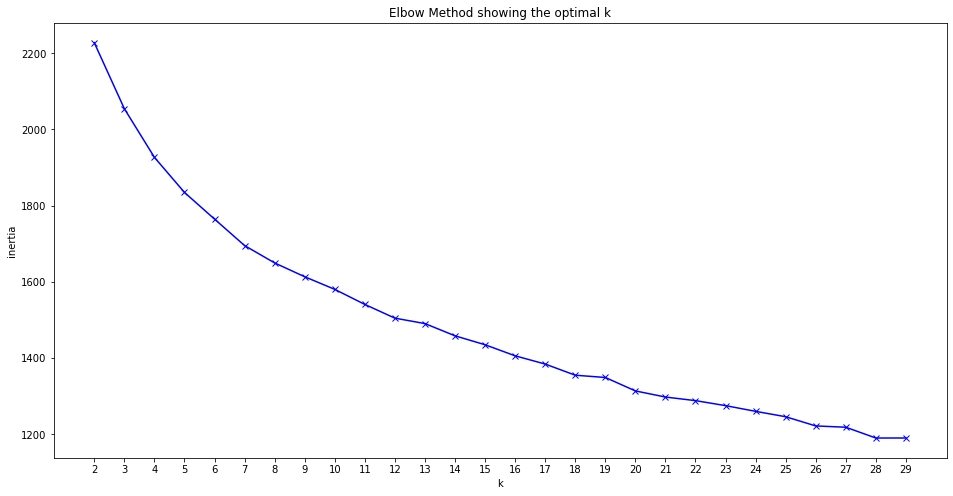

In [136]:
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [137]:
from sklearn.metrics import silhouette_score

K = range(7, 30)

silhouettes = []

for k in K: 
    kmeans=KMeans(n_clusters=k, random_state=40)
    kmeans.fit(X_encoded)
    silhouettes.append(silhouette_score(X_encoded, kmeans.predict(X_encoded)))

Text(0, 0.5, 'silhouette score')

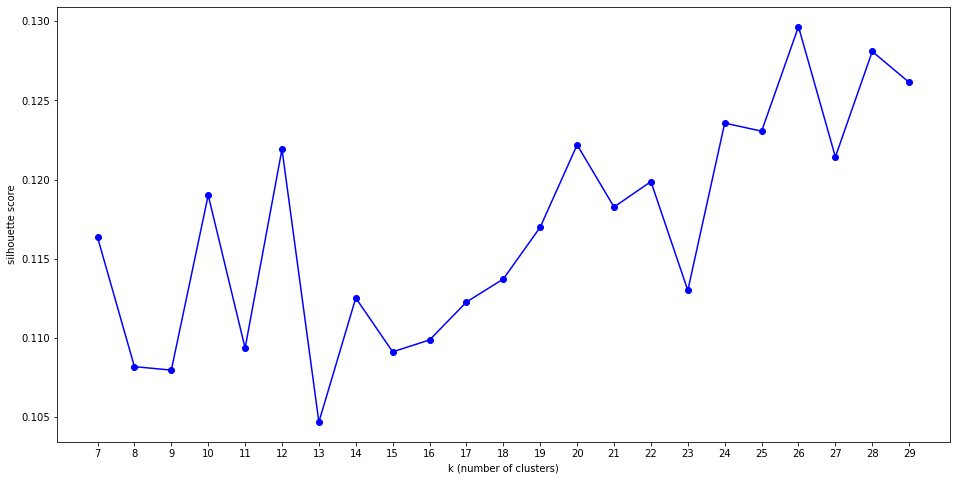

In [138]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('silhouette score')

##### Visualising clusters 

In [139]:
X_cluster['cluster'].value_counts()

0     59
10    57
2     48
3     41
11    40
1     38
4     32
5     28
7     27
6     23
8     18
9     14
Name: cluster, dtype: int64

In [140]:
X_cluster[X_cluster['cluster'] == 1].head(3)

,genre,publication_date_clean,time_clean,story_length,original_language,character_number,character_gender,character_age,pov,adaptation,cluster
2,historical,last years,past,standalone,spanish,1 - 3,female,18-30,external narrator,yes,1
10,horror,last years,past,standalone,english,1 - 3,female,31-40,external narrator,yes,1
17,generic fiction,last years,past,standalone,english,1 - 3,female,51-60,1st unique,no,1


In [183]:
data_clusters=pd.concat([data_books['title'], data_books['author'], X_cluster], axis=1)

In [184]:
data_clusters.head(3)

,title,author,genre,publication_date_clean,time_clean,story_length,original_language,character_number,character_gender,character_age,pov,adaptation,cluster
0,Nosotros en la luna,Alice kellen,romance,hot books,current time,standalone,spanish,1 - 3,female,18-30,1st multiple,no,0
1,El día que se perdio la cordura,Javier Castillo,thriller,last years,past,series/saga,spanish,4 - 6,male,41-50,1st multiple,no,5
2,Dime quién soy,Julia Navarro,historical,last years,past,standalone,spanish,1 - 3,female,18-30,external narrator,yes,1


In [143]:
# would get labels for that clusters using

# data_labels = kmeans.labels_

### Recommender 

In [189]:
def book_recommender():
    u_genre=input('What genre do you like? Choose one: non fiction, generic fiction, dystopian, fantasy, science fiction, historical, horror, mystery, thriller, romance, poetry: ')
    u_pubdate=input('How recently published do you like to read books? Choose between: hot books, last years, past decades, past centuries: ')
    u_settime=input('When do you prefer the story to take place? Choose one: current time, past, ficticious time: ')
    #u_length=input('How long do you want the book to be? Choose one: short, medium, long: ')
    u_storytype=input('What do you enjoy more, standalone books or series/saga books?: ')
    u_language=input('Which original language do you read more often? Choose one: english, spanish, catalan, chinese, danish, finnish, french, german, italian, japanese, norwegian, occitan, polish, romanian, russian, swedish: ')
    u_character=input('How many characters do you like a book to have? Choose between: 1 - 3, 4 - 6, +6: ')
    u_gender=input('Which gender do you prefer the main character to be? Choose one: female, male, non-binary, non-defined: ')
    u_age=input('How old do you like the main character to be? Choose between: 0-10, 11-17, 18-30, 31-40, 41-50, 51-60, +60, immortal: ')
    u_pov=input('Who do you like to tell the story? Choose one: external narrator, 1st unique, 1st multiple: ')
    u_adaptation=input('Do you like books with a film/tv adaptation? yes or no: ')
                
    u_df = pd.DataFrame({'genre' : u_genre,
                         'publication_date' : u_pubdate,
                         'time_clean' : u_settime,
                         #'pages_clean' : u_length,
                         'story_length' : u_storytype,
                         'original_language' : u_language,
                         'character_number' : u_character,
                         'character_gender' : u_gender,
                         'character_age' : u_age,
                         'pov' : u_pov,
                         'adaptation' : u_adaptation}, index=[0])
            
    user_encoded=enc.transform(u_df).toarray()
    user_cluster=kmeans.predict(user_encoded)
    recommendation=data_clusters[data_clusters['cluster'] == user_cluster[0]].sample(n=1)['title'].values[0]
    author=data_clusters[data_clusters['title']==recommendation]['author'].values[0]
    
    print("\n")
    print("\n")
    print("--------------------------")
    print('Here is the recommendation for you! ' + recommendation + ' by ' + author )
    #if check == 'no':
     #   print('Hope you enjoy it!')
    #else:
        #(second round?)

In [190]:
book_recommender()

What genre do you like? Choose one: non fiction, generic fiction, dystopian, fantasy, science fiction, historical, horror, mystery, thriller, romance, poetry: fantasy
How recently published do you like to read books? Choose between: hot books, last years, past decades, past centuries: last years
When do you prefer the story to take place? Choose one: current time, past, ficticious time: ficticious time
What do you enjoy more, standalone books or series/saga books?: series/saga
Which original language do you read more often? Choose one: english, spanish, catalan, chinese, danish, finnish, french, german, italian, japanese, norwegian, occitan, polish, romanian, russian, swedish: english
How many characters do you like a book to have? Choose between: 1 - 3, 4 - 6, +6: 4 - 6
Which gender do you prefer the main character to be? Choose one: female, male, non-binary, non-defined: male
How old do you like the main character to be? Choose between: 0-10, 11-17, 18-30, 31-40, 41-50, 51-60, +60, i

##### Appendix  

Here is the original dataset with clusters aggregate.

In [197]:
books_clusters=pd.concat([data_books, X_cluster['cluster']], axis=1)

In [201]:
books_clusters=books_clusters.drop(['Unnamed: 0'], axis=1)

In [202]:
books_clusters.head(5)

,title,author,publishing_house,genre,subgenre,publication_date,pages,edition,story_length,original_language,theme,main_topics,setting_time,setting_place,character_number,character_gender,character_age,character_description,pov,adaptation,review,feelings,quote,time_clean,publication_date_clean,pages_clean,cluster
0,Nosotros en la luna,Alice kellen,Planeta,romance,new adult,2020,477,"paperback, pocket",standalone,spanish,Una chica que acaba de romper con su novio de ...,"friendship, love, goals/dreams, personal growt...",current time,"paris, london, ibiza, australia, usa",1 - 3,female,18-30,"Ginger empieza siendo una chica insegura, está...",1st multiple,no,"i recommend, favourite one, easy to read, cohe...","reflexive, escape from reality, intense emotio...",Es imposible saber cuando conocerás a esa pers...,current time,hot books,medium,0
1,El día que se perdio la cordura,Javier Castillo,Debolsillo,thriller,psychological,2017,456,"paperback, pocket",series/saga,spanish,"Amor, odio, extrañas prácticas, intriga y acci...",love,1892,uk,4 - 6,male,41-50,Una persona adulta,1st multiple,no,"i recommend, favourite one","intense emotions, nervousness, empathy","Todavía no me puedo creer lo que hice anoche, ...",past,last years,medium,5
2,Dime quién soy,Julia Navarro,Plaza Janes,historical,NaN,2010,1097,"paperback, pocket",standalone,spanish,La familia de Amelia Garayoa (bisabuela) quier...,"family, love, revenge, pain/trauma, personal g...",1960,"spain, paris, buenos aires, moscow, rome, lond...",1 - 3,female,18-30,Valiente pero a la vez insegura. Inmadura en m...,external narrator,yes,"i recommend, favourite one, addictive, wonderf...","reflexive, intense emotions, overall good feel...",El despacho de mi tía resultaba agobiante. En ...,past,last years,long,1
3,Una corte de rosas y espinas,Sarah J Maas,Planeta,fantasy,romance,2016,463,paperback,series/saga,english,Una chica humana que vive en un mundo donde se...,"family, friendship, love, feminism",ficticious time,ficticious world,4 - 6,female,18-30,Fuerte pero con cierta vulnerabilidad,1st unique,no,favourite one,"intense emotions, love",Por las estrellas que escuchan y los sueños qu...,ficticious time,last years,medium,2
4,Frankenstein o El Moderno Prometeo,Mary Shelley,Edimat,science fiction,"classic, gothic, victorian",1818,250,hardback,standalone,english,Un científico descubre cómo darle vida a una c...,"goals/dreams, good and evil forces , nature, g...",1700,"geneva, london, germany",1 - 3,male,18-30,Hombre joven de la clase aristocrática de Gine...,1st multiple,yes,"i recommend, favourite one, wonderful characte...","fun/laughing, reflexive, empathy, sadness, ten...","Aprende de mí, sino por mis preceptos, al meno...",past,past centuries,short,6


In [203]:
books_clusters.shape

(425, 27)

In [204]:
books_clusters.to_excel('books_clusters12.xlsx', index=False)